In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [43]:
train_df = pd.read_csv('../data/train_with_feautures.csv')
train_df = train_df[~train_df.census_tract.isna()]
X = train_df[['year', 'month', 'bathroomcnt', 'bedroomcnt',
              'buildingqualitytypeid', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
              'finishedsquarefeet12', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
              'heatingorsystemtypeid', 'lotsizesquarefeet', 'poolcnt',
              'roomcnt', 'taxvaluedollarcnt', 'assessmentyear',
              'landtaxvaluedollarcnt','taxamount', 'total', 'White_Percentage', 'Black_Percentage',
              'h_l_Percentage', 'not_h_l_Percentage', 'Asian_Percentage', 'census_tract']]

X['poolcnt'] = X['poolcnt'].fillna(0.0)
X['buildingqualitytypeid'] = X['buildingqualitytypeid'].fillna(0.0)

X['fireplacecnt'] = X['fireplacecnt'].fillna(0.0)
X['fireplacecnt'] = X['fireplacecnt'].astype(float)

X.loc[X['bathroomcnt'] == '3+', 'bathroomcnt'] = 4.0
X['bathroomcnt'] = X['bathroomcnt'].astype(float)
X.loc[X['bathroomcnt'] >= 3, 'bathroomcnt'] = '3+'

X.loc[X['bedroomcnt'] == '3+', 'bedroomcnt'] = 4.0
X['bedroomcnt'] = X['bedroomcnt'].astype(float)
X.loc[X['bedroomcnt'] >= 3, 'bedroomcnt'] = '3+'

X.loc[X['calculatedbathnbr'] == '5+', 'calculatedbathnbr'] = 5.0
X['calculatedbathnbr'] = X['calculatedbathnbr'].astype(float)
X.loc[X['calculatedbathnbr'] >= 5, 'calculatedbathnbr'] = '5+'

X.loc[X['calculatedfinishedsquarefeet'] == '5+', 'calculatedfinishedsquarefeet'] = 5000
X['calculatedfinishedsquarefeet'] = X['calculatedfinishedsquarefeet'].astype(float)

y = train_df[['logerror']]

/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_53408/4275464869.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['poolcnt'] = X['poolcnt'].fillna(0.0)
/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_53408/4275464869.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['buildingqualitytypeid'] = X['buildingqualitytypeid'].fillna(0.0)
/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_53408/4275464869.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [44]:
category_variables = ['year', 'month', 'fireplacecnt', 'bathroomcnt', 'calculatedbathnbr',
                     'garagecarcnt', 'heatingorsystemtypeid', 'poolcnt', 'assessmentyear', 'bedroomcnt', 'census_tract']

for col in category_variables:
    X[col] = X[col].astype('category')
    
for col in X.columns:
    if col not in category_variables:
        print(col)
        X[col] = X[col].astype('float')

buildingqualitytypeid
calculatedfinishedsquarefeet
finishedsquarefeet12
fullbathcnt
garagetotalsqft
lotsizesquarefeet
roomcnt
taxvaluedollarcnt
landtaxvaluedollarcnt
taxamount
total
White_Percentage
Black_Percentage
h_l_Percentage
not_h_l_Percentage
Asian_Percentage


/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_53408/4045617365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_53408/4045617365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
/var/folders/sx/h0nzb83j4f7632pxq_w2dmgr0000gp/T/ipykernel_53408/4045617365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.3)

In [46]:
X_train.dtypes

year                            category
month                           category
bathroomcnt                     category
bedroomcnt                      category
buildingqualitytypeid            float64
calculatedbathnbr               category
calculatedfinishedsquarefeet     float64
finishedsquarefeet12             float64
fireplacecnt                    category
fullbathcnt                      float64
garagecarcnt                    category
garagetotalsqft                  float64
heatingorsystemtypeid           category
lotsizesquarefeet                float64
poolcnt                         category
roomcnt                          float64
taxvaluedollarcnt                float64
assessmentyear                  category
landtaxvaluedollarcnt            float64
taxamount                        float64
total                            float64
White_Percentage                 float64
Black_Percentage                 float64
h_l_Percentage                   float64
not_h_l_Percenta

In [47]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [48]:
params = {"objective": "reg:squarederror"}
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

n=50
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=50,
   early_stopping_rounds=50
)


[0]	validation-rmse:0.37730	train-rmse:0.37803
[49]	validation-rmse:0.16628	train-rmse:0.14393


In [49]:
preds = model.predict(dtest_reg)
rmse = mean_squared_error(y_test['logerror'], preds, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 0.166


In [50]:
preds

array([-0.00089449,  0.04353946,  0.0170693 , ...,  0.01944389,
        0.00665075,  0.02101265], dtype=float32)

In [51]:
y_test['preds'] = preds

In [52]:
y_test

,logerror,preds
18766,-0.084500,-0.000894
109741,-0.086868,0.043539
83962,0.020800,0.017069
57647,-0.011100,0.006690
35963,0.005000,0.047502
...,...,...
81971,0.020800,0.031634
96024,0.016836,0.022917
54519,0.085300,0.019444
31731,0.029600,0.006651


<AxesSubplot: xlabel='logerror', ylabel='preds'>

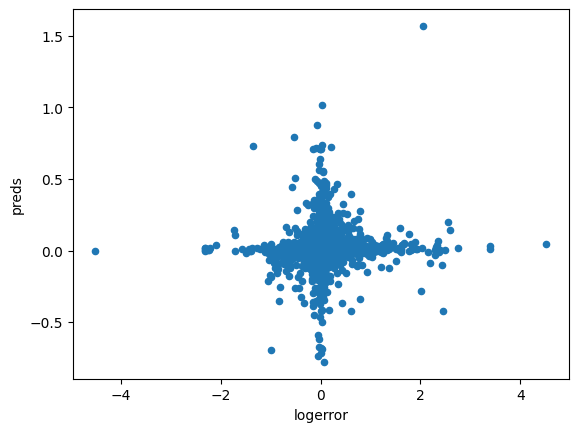

In [53]:
y_test.plot.scatter(x='logerror', y='preds')

<AxesSubplot: >

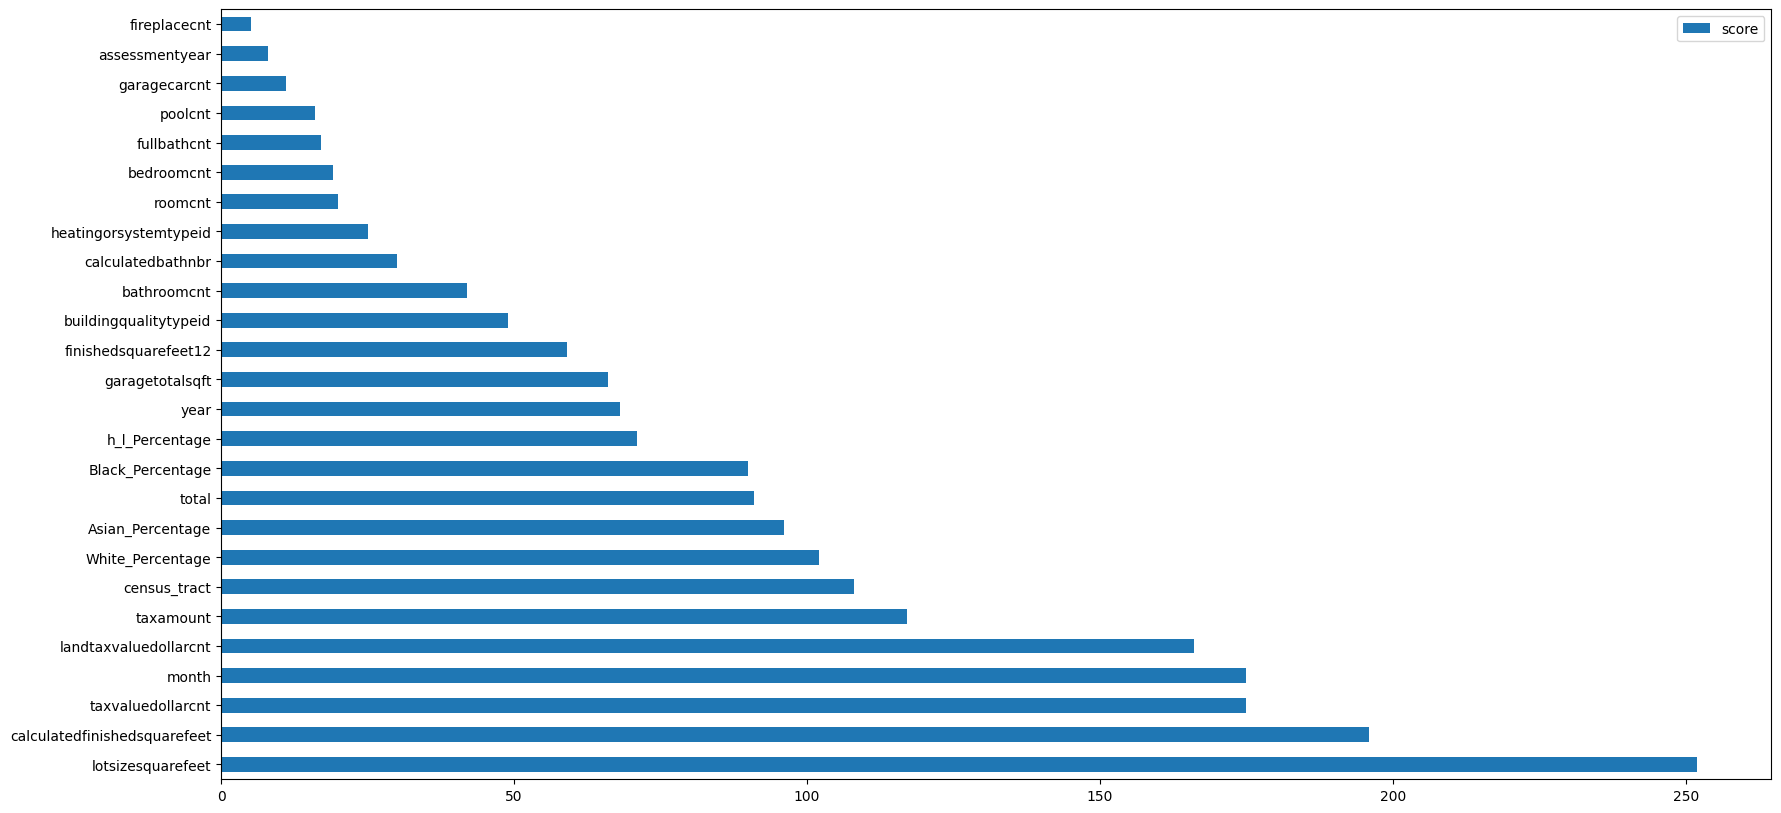

In [54]:
feature_important = model.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [55]:
test_df = pd.read_csv('../data/test_with_feautures.csv')

In [ ]:
X = test_df[['year', 'month', 'bathroomcnt', 'bedroomcnt',
              'buildingqualitytypeid', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
              'finishedsquarefeet12', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
              'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt',
              'roomcnt', 'taxvaluedollarcnt', 'assessmentyear',
              'landtaxvaluedollarcnt','taxamount', 'total', 'White_Percentage', 'Black_Percentage',
              'h_l_Percentage', 'not_h_l_Percentage', 'Asian_Percentage']]

X['poolcnt'] = X['poolcnt'].fillna(0.0)

X['fireplacecnt'] = X['fireplacecnt'].fillna(0.0)
X['fireplacecnt'] = X['fireplacecnt'].astype(float)

X.loc[X['bathroomcnt'] == '3+', 'bathroomcnt'] = 4.0
X['bathroomcnt'] = X['bathroomcnt'].astype(float)
X.loc[X['bathroomcnt'] >= 3, 'bathroomcnt'] = '3+'

X.loc[X['bedroomcnt'] == '3+', 'bedroomcnt'] = 4.0
X['bedroomcnt'] = X['bedroomcnt'].astype(float)
X.loc[X['bedroomcnt'] >= 3, 'bedroomcnt'] = '3+'

X.loc[X['calculatedbathnbr'] == '5+', 'calculatedbathnbr'] = 5.0
X['calculatedbathnbr'] = X['calculatedbathnbr'].astype(float)
X.loc[X['calculatedbathnbr'] >= 5, 'calculatedbathnbr'] = '5+'

X.loc[X['calculatedfinishedsquarefeet'] == '5+', 'calculatedfinishedsquarefeet'] = 5000
X['calculatedfinishedsquarefeet'] = X['calculatedfinishedsquarefeet'].astype(float)

y = test_df[['logerror']]




category_variables = ['year', 'month', 'buildingqualitytypeid', 'fireplacecnt', 'bathroomcnt', 'calculatedbathnbr',
                     'garagecarcnt', 'heatingorsystemtypeid', 'poolcnt', 'assessmentyear', 'bedroomcnt']

for col in category_variables:
    X[col] = X[col].astype('category')
    
for col in X.columns:
    if col not in category_variables:
        print(col)
        X[col] = X[col].astype('float')

In [ ]:
dtest_final = xgb.DMatrix(X, y, enable_categorical=True)
preds = model.predict(dtest_final)
preds

In [ ]:
submit_df = pd.read_csv('../data/test.csv')
submit_df['logerror'] = preds

In [ ]:
submit_df

In [68]:
mu = train_df.taxvaluedollarcnt.mean()
print(np.exp(train_df[train_df.taxvaluedollarcnt >= mu].logerror.mean()))
print(np.exp(train_df[train_df.taxvaluedollarcnt < mu].logerror.mean()))

1.0115030710794202
1.0150864860218374


Index(['Unnamed: 0', 'parcelid', 'logerror', 'transactiondate_new', 'year',
       'month', 'census_tract', 'airconditioningtypeid', 'bathroomcnt',
       'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'propertyzoningdesc', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'state', 'total',
       'White_Percentage', 'Black_Percentage', 'h_l_Percentage',
       'not_h_l_Percentage', 'Asian_Percentage'],
      dtype='object')